<a href="https://colab.research.google.com/github/jhxseng/jhxseng/blob/main/Proyecto_IA_Seguridad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Se importa el archivo csv.
from google.colab import files
subir = files.upload()

Saving DATASET_SEGURIDAD_CALLAO_FEBRERO2024_0.csv to DATASET_SEGURIDAD_CALLAO_FEBRERO2024_0.csv


In [ ]:
# Obtiene el nombre del archivo subido
file_name = list(subir.keys())[0]
df = pd.read_csv(file_name, sep=";")

In [ ]:
# Verificamos el tamaño de nuestro dataset.
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")

El dataset tiene 2643 filas y 26 columnas.



In [ ]:
# Mostramos la estructura del dataset.
print(df.head())

   FECHA_CORTE  FECHA_REGISTRO  \
0     20240425        20240226   
1     20240425        20240221   
2     20240425        20240210   
3     20240425        20240220   
4     20240425        20240223   

                                     ID_DOC_DENUNCIA  UBIGEO DEPARTAMENTO  \
0  4e35831afdd9aa1958807a7b32ea5b53a26aa74d1556d5...   70101       CALLAO   
1  7ccf55ed76f62bc29e46f082caa7e57c289dc59bded9d8...   70101       CALLAO   
2  fed71611056418d9ebbda0717e8252554c85b3b08f34fa...   70101       CALLAO   
3  7d920f96de74cf295cbbb4da54057db724c98421ffa0a1...   70101       CALLAO   
4  060b191856ee7bf4feb80322d9c04ff36bbc99eaa75075...   70101       CALLAO   

  PROVINCIA DISTRITO      TIPO_DE_DENUNCIA SITUACION_DENUNCIA  \
0    CALLAO   CALLAO              DENUNCIA          PENDIENTE   
1    CALLAO   CALLAO              DENUNCIA           RESUELTA   
2    CALLAO   CALLAO              DENUNCIA           RESUELTA   
3    CALLAO   CALLAO              DENUNCIA           RESUELTA   
4    CA

In [ ]:

# Construimos el dataframe.
data_dict = pd.DataFrame({
    'Columna': df.columns,
    'Tipo de dato': [str(df[col].dtype) for col in df.columns]
})
display(data_dict)

,Columna,Tipo de dato
0,FECHA_CORTE,int64
1,FECHA_REGISTRO,int64
2,ID_DOC_DENUNCIA,object
3,UBIGEO,int64
4,DEPARTAMENTO,object
5,PROVINCIA,object
6,DISTRITO,object
7,TIPO_DE_DENUNCIA,object
8,SITUACION_DENUNCIA,object
9,TIPO,object


In [ ]:
# Comprobamos valores nulos.
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
FECHA_CORTE           0
FECHA_REGISTRO        0
ID_DOC_DENUNCIA       0
UBIGEO                0
DEPARTAMENTO          0
PROVINCIA             0
DISTRITO              0
TIPO_DE_DENUNCIA      0
SITUACION_DENUNCIA    0
TIPO                  0
SUBTIPO               0
MODALIDAD             0
FECHA_HECHO           0
HORA_HECHO            0
UBICACION             0
DESCRIPCION           0
FECHA_NACIMIENTO      0
EDAD_PERSONA          0
SEXO                  0
ESTADO_CIVIL          0
GRADO_INSTRUCCION     0
OCUPACION             0
PAIS_NATAL            0
MES                   0
LONGITUD              4
LATITUD               4
dtype: int64


In [ ]:
#Eliminar posibles espacios extras dentro de los valores

df['SUBTIPO'] = df['SUBTIPO'].str.replace(r'\s+', ' ', regex=True)


In [ ]:
#Mostramos info del dataframe.
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2639 entries, 0 to 2642
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FECHA_CORTE         2639 non-null   int64  
 1   FECHA_REGISTRO      2639 non-null   int64  
 2   ID_DOC_DENUNCIA     2639 non-null   object 
 3   UBIGEO              2639 non-null   int64  
 4   DEPARTAMENTO        2639 non-null   object 
 5   PROVINCIA           2639 non-null   object 
 6   DISTRITO            2639 non-null   object 
 7   TIPO_DE_DENUNCIA    2639 non-null   object 
 8   SITUACION_DENUNCIA  2639 non-null   object 
 9   TIPO                2639 non-null   object 
 10  SUBTIPO             2639 non-null   object 
 11  MODALIDAD           2639 non-null   object 
 12  FECHA_HECHO         2639 non-null   int64  
 13  HORA_HECHO          2639 non-null   int64  
 14  UBICACION           2639 non-null   object 
 15  DESCRIPCION         2639 non-null   object 
 16  FECHA_NACIM

In [ ]:
# Eliminamos las filas duplicadas
print(f"Filas duplicadas antes de eliminar: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Filas duplicadas después de eliminar: {df.duplicated().sum()}")

Filas duplicadas antes de eliminar: 0
Filas duplicadas después de eliminar: 0


In [ ]:
# Eliminar filas con nulos en LONGITUD o LATITUD
df = df.dropna(subset=['LONGITUD', 'LATITUD'])

print("Valores nulos después del tratamiento:")
print(df.isnull().sum())


Valores nulos después del tratamiento:
FECHA_CORTE           0
FECHA_REGISTRO        0
ID_DOC_DENUNCIA       0
UBIGEO                0
DEPARTAMENTO          0
PROVINCIA             0
DISTRITO              0
TIPO_DE_DENUNCIA      0
SITUACION_DENUNCIA    0
TIPO                  0
SUBTIPO               0
MODALIDAD             0
FECHA_HECHO           0
HORA_HECHO            0
UBICACION             0
DESCRIPCION           0
FECHA_NACIMIENTO      0
EDAD_PERSONA          0
SEXO                  0
ESTADO_CIVIL          0
GRADO_INSTRUCCION     0
OCUPACION             0
PAIS_NATAL            0
MES                   0
LONGITUD              0
LATITUD               0
dtype: int64


In [ ]:
# Codificación de variable 'SUBTIPO'
df_encoded = pd.get_dummies(df, columns=['SUBTIPO'], drop_first=True)

print("Vista previa del dataframe codificado:")
print(df_encoded.head())

Vista previa del dataframe codificado:
   FECHA_CORTE  FECHA_REGISTRO  \
0     20240425        20240226   
1     20240425        20240221   
2     20240425        20240210   
3     20240425        20240220   
4     20240425        20240223   

                                     ID_DOC_DENUNCIA  UBIGEO DEPARTAMENTO  \
0  4e35831afdd9aa1958807a7b32ea5b53a26aa74d1556d5...   70101       CALLAO   
1  7ccf55ed76f62bc29e46f082caa7e57c289dc59bded9d8...   70101       CALLAO   
2  fed71611056418d9ebbda0717e8252554c85b3b08f34fa...   70101       CALLAO   
3  7d920f96de74cf295cbbb4da54057db724c98421ffa0a1...   70101       CALLAO   
4  060b191856ee7bf4feb80322d9c04ff36bbc99eaa75075...   70101       CALLAO   

  PROVINCIA DISTRITO      TIPO_DE_DENUNCIA SITUACION_DENUNCIA  \
0    CALLAO   CALLAO              DENUNCIA          PENDIENTE   
1    CALLAO   CALLAO              DENUNCIA           RESUELTA   
2    CALLAO   CALLAO              DENUNCIA           RESUELTA   
3    CALLAO   CALLAO             

# *Análisis univariado.*


In [ ]:
# Mostramos media, mediana y moda de nuestros datos cuantitativos.

quant_vars = ['LONGITUD', 'LATITUD']

# Calcular media, mediana y moda
stats = pd.DataFrame({
    'Variable': quant_vars,
    'Media': [df[col].mean() for col in quant_vars],
    'Mediana': [df[col].median() for col in quant_vars],
    'Moda': [df[col].mode().iloc[0] for col in quant_vars]
})

print(stats)

   Variable      Media    Mediana       Moda
0  LONGITUD -77.117407 -77.118558 -77.125984
1   LATITUD -12.005336 -12.040762 -12.050849


In [ ]:
# Calculamos cuartiles.

quartiles = df[quant_vars].quantile([0.25, 0.5, 0.75])
print(quartiles)

       LONGITUD    LATITUD
0.25 -77.127663 -12.052491
0.50 -77.118558 -12.040762
0.75 -77.103614 -11.990753


In [ ]:

#Hallamos min, max de los datos cuantitativos

min_max = df[quant_vars].agg(['min', 'max']).transpose().reset_index()
min_max.columns = ['Variable', 'Min', 'Max']
print(min_max)

   Variable        Min        Max
0  LONGITUD -77.174360 -77.082273
1   LATITUD -12.078188 -11.819103


In [ ]:
# Obtenemos la frecuencia por SUBTIPO.

print("Frecuencia por subtipo de delito:")
print(df['SUBTIPO'].value_counts())



Frecuencia por subtipo de delito:
SUBTIPO
LEY PARA PREVENIR   SANCIONAR Y ERRADICAR LA VIOLENCIA CONTRA LAS MUJERES Y LOS INTEGRANTES DEL GRUPO FAMILIAR (LEY NRO 30364)    937
HURTO                                                                                                                             320
ROBO                                                                                                                              236
PELIGRO COMUN                                                                                                                     206
RECEPTACION                                                                                                                       131
FALSIFICACION DE DOCUMENTOS EN GENERAL                                                                                            109
ESTAFA Y OTRAS DEFRAUDACIONES                                                                                                      95
DELITOS INFORMATICOS

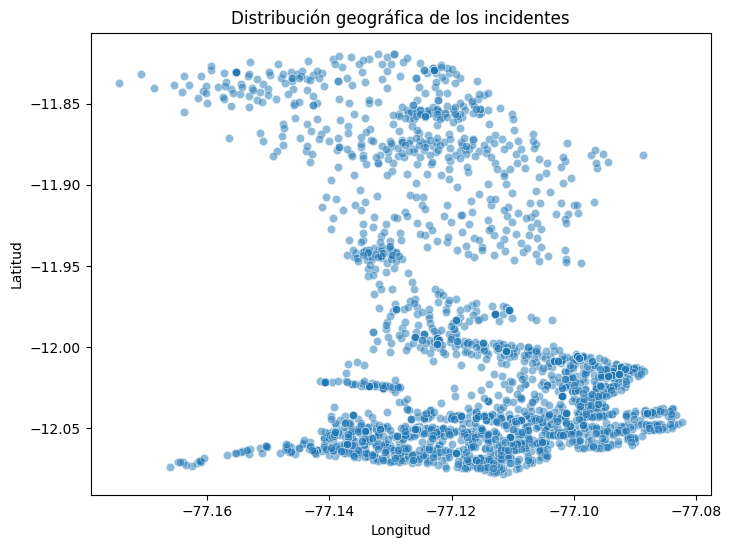

In [ ]:
# Visualizamos en un mapa de puntos la concentración geográfica.

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='LONGITUD', y='LATITUD', alpha=0.5)
plt.title("Distribución geográfica de los incidentes")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

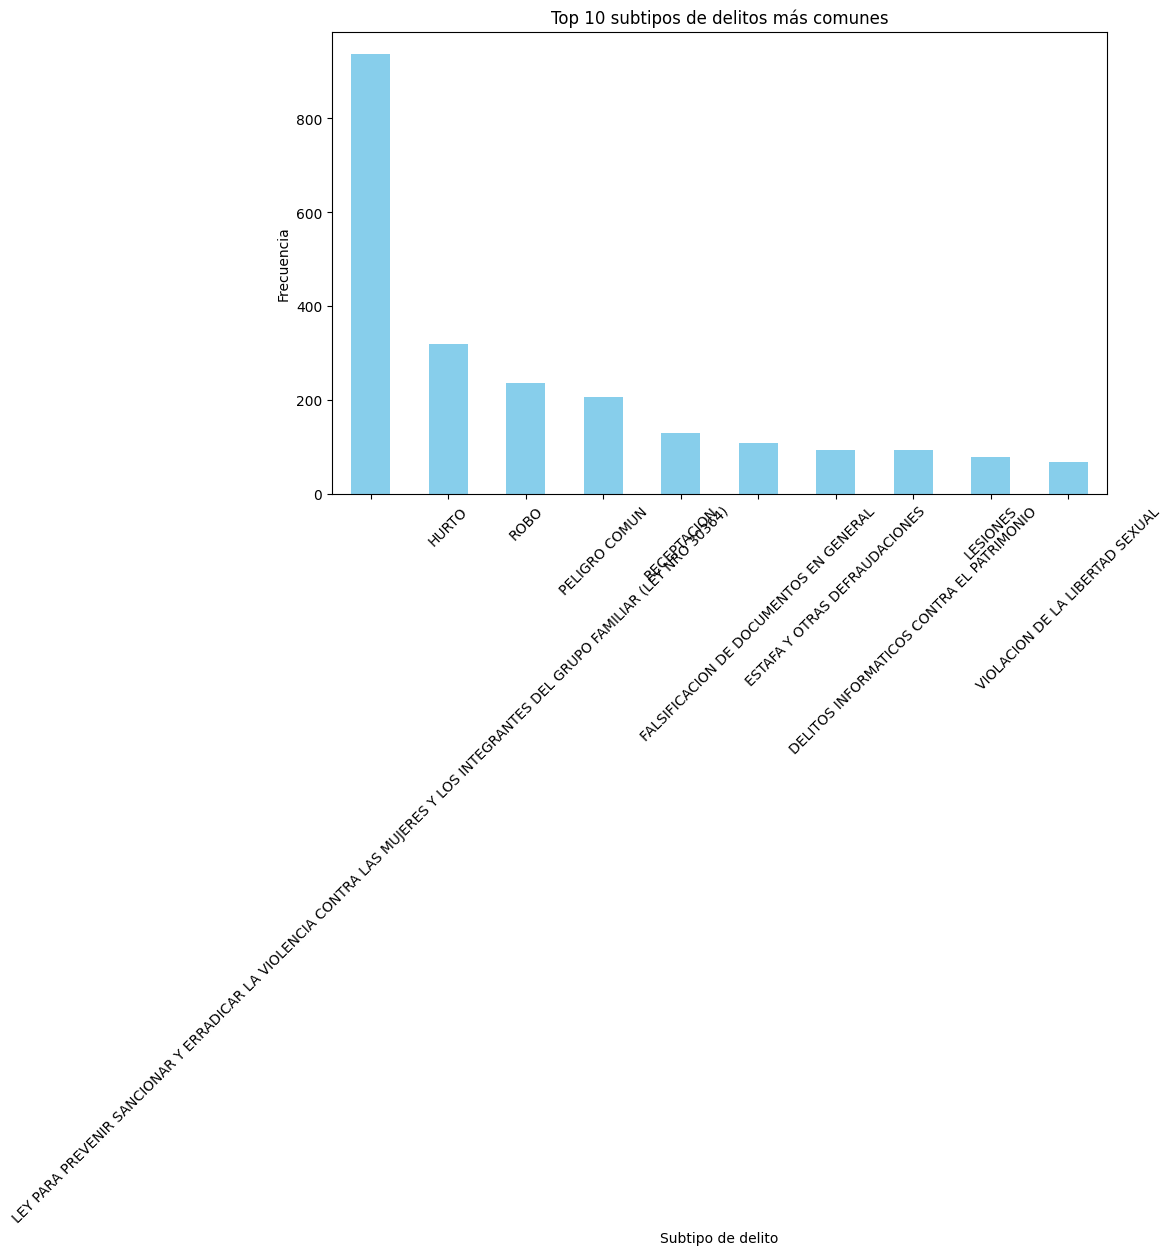

In [ ]:
# Distribución de los subtipos de delitos
plt.figure(figsize=(10, 6))
df['SUBTIPO'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 subtipos de delitos más comunes")
plt.xlabel("Subtipo de delito")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Lista de subtipos que se tomarán en cuenta
subtipos_filtrar = ['HURTO', 'ROBO', 'HOMICIDIO', 'EXTORSION']

# Filtrar el DataFrame
df_filtrado = df[df['SUBTIPO'].isin(subtipos_filtrar)]

print(df_filtrado.head())

print(f"El dataset ahora tiene {df_filtrado.shape[0]} filas y {df_filtrado.shape[1]} columnas.\n")


   FECHA_CORTE  FECHA_REGISTRO  \
4     20240425        20240223   
5     20240425        20240225   
7     20240425        20240214   
8     20240425        20240205   
9     20240425        20240205   

                                     ID_DOC_DENUNCIA  UBIGEO DEPARTAMENTO  \
4  060b191856ee7bf4feb80322d9c04ff36bbc99eaa75075...   70101       CALLAO   
5  57c0ea81739114f4a0132b5c2508ee00ad6b5ea02963f4...   70101       CALLAO   
7  7876e6243cb2c76fa403ce85c8e13f8e43798eb305937f...   70101       CALLAO   
8  efc01282d9e7c69bb3dc2a612c74ae61d8bdd59a070876...   70101       CALLAO   
9  606365c58e998e1a515023bb1207b63911bc25aa7b2dec...   70101       CALLAO   

  PROVINCIA DISTRITO      TIPO_DE_DENUNCIA SITUACION_DENUNCIA  \
4    CALLAO   CALLAO  ACTA DE INTERVENCION           RESUELTA   
5    CALLAO   CALLAO  ACTA DE INTERVENCION           RESUELTA   
7    CALLAO   CALLAO              DENUNCIA          PENDIENTE   
8    CALLAO   CALLAO              DENUNCIA          PENDIENTE   
9    CA

In [ ]:
# Codificación de variable 'SUBTIPO'
df_encoded = pd.get_dummies(df_filtrado, columns=['SUBTIPO'], drop_first=True)

print("Vista previa del dataframe codificado:")
print(df_encoded.head())

Vista previa del dataframe codificado:
   FECHA_CORTE  FECHA_REGISTRO  \
4     20240425        20240223   
5     20240425        20240225   
7     20240425        20240214   
8     20240425        20240205   
9     20240425        20240205   

                                     ID_DOC_DENUNCIA  UBIGEO DEPARTAMENTO  \
4  060b191856ee7bf4feb80322d9c04ff36bbc99eaa75075...   70101       CALLAO   
5  57c0ea81739114f4a0132b5c2508ee00ad6b5ea02963f4...   70101       CALLAO   
7  7876e6243cb2c76fa403ce85c8e13f8e43798eb305937f...   70101       CALLAO   
8  efc01282d9e7c69bb3dc2a612c74ae61d8bdd59a070876...   70101       CALLAO   
9  606365c58e998e1a515023bb1207b63911bc25aa7b2dec...   70101       CALLAO   

  PROVINCIA DISTRITO      TIPO_DE_DENUNCIA SITUACION_DENUNCIA  \
4    CALLAO   CALLAO  ACTA DE INTERVENCION           RESUELTA   
5    CALLAO   CALLAO  ACTA DE INTERVENCION           RESUELTA   
7    CALLAO   CALLAO              DENUNCIA          PENDIENTE   
8    CALLAO   CALLAO             